In [1]:
import numpy as np
import dlsfunctions as dls
import initialization_data as init
import matplotlib.pyplot as plt

In [2]:
# generates unequal-amplitude bimodal distribution
def generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, mie_fract):
    f1 = 1/(sigma1*np.sqrt(2*np.pi**2))*np.exp(-(d-mean1)**2/(2*sigma1**2))
    f1 = f1* dls.normalize(f1, 1, d[1] - d[0])
    
    f2 = 1/(sigma2*np.sqrt(2*np.pi**2))*np.exp(-(d-mean2)**2/(2*sigma2**2))
    f2 = f2 * dls.normalize(f2, 1, d[1] - d[0])
    
    f = f1 + 2*f2
    f = f * dls.normalize(f, 1, d[1] - d[0])
    return f

In [3]:
d = init.get_distance()

mean1 = init.get_left_mean()
sigma1 = init.get_narrow_sigma()

mean2 = init.get_right_mean()
sigma2 = init.get_narrow_sigma()

c = init.c
m = init.m
beta = init.beta

f = generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, c)

time = init.get_log_time()
gamma = init.get_gamma()

noise = np.random.normal(mean1, sigma1, 200)*5e7

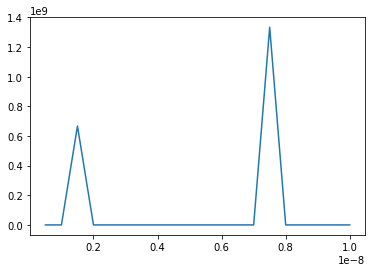

In [4]:
plt.plot(d,f)

In [5]:
dls.check_distribution_norm(f, d[1] - d[0])

1.0

In [6]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise

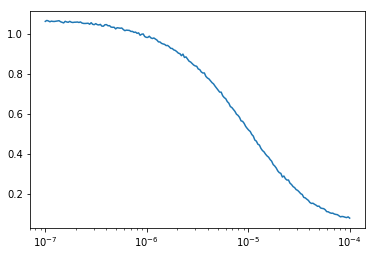

In [7]:
plt.semilogx(time, sim_data)

In [8]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [9]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.346, 0.304, 0.355, 0.334, 0.311, 0.348, 0.351, 0.334, 0.33 ,
       0.341, 0.328, 0.302, 0.342, 0.324, 0.311, 0.31 , 0.352, 0.324,
       0.366, 0.353, 0.321, 0.332, 0.343, 0.35 , 0.345, 0.305, 0.351,
       0.309, 0.341, 0.313, 0.313, 0.365, 0.329, 0.382, 0.334, 0.318,
       0.344, 0.294, 0.376, 0.301, 0.317, 0.326, 0.343, 0.333, 0.359,
       0.318, 0.343, 0.324, 0.318, 0.315, 0.334, 0.317, 0.339, 0.334,
       0.358, 0.319, 0.286, 0.345, 0.293, 0.325, 0.345, 0.343, 0.312,
       0.332, 0.34 , 0.332, 0.363, 0.297, 0.351, 0.341, 0.319, 0.343,
       0.344, 0.35 , 0.351, 0.356, 0.304, 0.361, 0.336, 0.338, 0.343,
       0.33 , 0.368, 0.349, 0.298, 0.311, 0.334, 0.36 , 0.338, 0.314,
       0.325, 0.318, 0.323, 0.325, 0.34 , 0.31 , 0.342, 0.32 , 0.336,
       0.326])

In [10]:
chained_sampler = dls.chain(result, 850, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,5.297305,10.027504,1.012616,20.04013,7.295544,0.230164,1.333333e+09,19.206371,1.636351,38.436268,11.062473,0.126164,6.666667e+08,1.531201,39.16679,0.282599,2.794147,3.79387,0.466208,7.514758


In [11]:
infer = dls.get_infer_f(q, m)

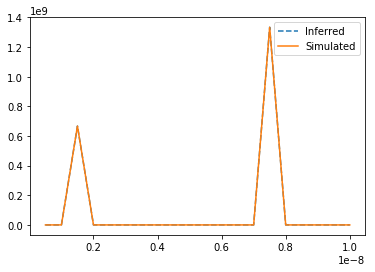

In [12]:
plt.plot(d, infer, '--', label='Inferred')
plt.plot(d, f, label='Simulated')
plt.legend()

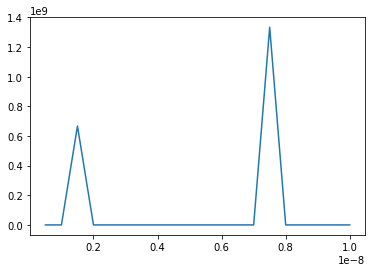

In [13]:
plt.plot(d, f)

In [ ]:
beta_post = dls.get_beta(chained_sampler, ndim)
betaq = beta_post.quantile([0.5], axis=0)
betaq

In [ ]:
theta_infer = np.append(infer, 1.14112)
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='simulated')
plt.legend()

In [ ]:
beta_posterior = beta_post.values.flatten()
plt.hist(beta_posterior)